In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Задание 1

# 1.1 Сгенерировать случайным образом массив numpy из 1000 значений
# нормально распределенной случайной величины с мат. ожиданием M = 1.0 и стандартным отклонением s = 1.0
# Преобразовать его в объект Series
M = 1.0
s = 1.0
k = 1000
arr = pd.Series(np.random.normal(M, s, k))
arr.head(5).round(3)

,0
0,1.318
1,1.355
2,1.393
3,-0.250
4,0.700


In [ ]:
# 1.2 Вычислить, какая доля всех значений находится в диапазоне (M-s; M+s)
arr[(arr >= (M - s)) & (arr <= (M + s))].count()/k

0.683

In [ ]:
# 1.3 Вычислить, какая доля всех значений находится в диапазоне (M-3s; M+3s)
# Какой должна быть эта доля теоретически? Насколько реальный результат соответствует теории?
arr[(arr >= (M - s * 3)) & (arr <= (M + s * 3))].count()/k

0.998

In [ ]:
# 1.4 Заменить каждое значение x в серии на его квадратный корень (numpy.sqrt(x))
# Результат записать в новый объект Series
# Почему возникает предупреждение, и что происходит с теми значениями, для которых возникает предупреждение?
arr1 = pd.Series(np.sqrt(arr))
arr1.head(10).round(3)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


,0
0,1.148
1,1.164
2,1.180
3,NaN
4,0.836
5,0.991
6,1.031
7,1.303
8,0.767
9,NaN


In [ ]:
# 1.5 Посчитать среднее арифметическое для получившихся значений
# Отсутствующие значения (NaN) учитываться не должны
np.nanmean(arr1).round(3)

1.083

In [ ]:
# 1.6 На основе двух объектов Series (исходного и полученного на шаге 4) создать DataFrame с двумя столбцами
# Названия (явные индексы) для столбцов: «number» и «root» соответственно
# Явные индексы для строк не задавать
# Вывести первые 6 строк из созданного датафрейма
dt = pd.DataFrame({'number': arr, 'root': arr1})
dt.head(6).round(3)

,number,root
0,1.318,1.148
1,1.355,1.164
2,1.393,1.180
3,-0.250,NaN
4,0.700,0.836
5,0.983,0.991


In [ ]:
# 1.7 С помощью функции query найти в датафрейме записи, в которых значение квадратного корня находится в диапазоне от 1.8 до 1.9
dt.query('root >= 1.8 and root <= 1.9').round(3)

,number,root
35,3.346,1.829
36,3.552,1.885
139,3.301,1.817
202,3.583,1.893
328,3.498,1.870
502,3.420,1.849
625,3.360,1.833
642,3.425,1.851
734,3.291,1.814
812,3.405,1.845


In [2]:
# Задание 2

# 2.1 Загрузите из файла данные о спортсменах–участниках олимпийских игр
data = pd.read_csv('drive/MyDrive/athlete_events.csv')
data.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [ ]:
# 2.2 Определите количество значений каждого из признаков в загруженных данных
c = data.count()
c

,0
ID,271116
Name,271116
Sex,271116
Age,261642
Height,210945
Weight,208241
Team,271116
NOC,271116
Games,271116
Year,271116


In [ ]:
# По каким значениям имеются не все данные?
c[c != c.max()]

,0
Age,261642
Height,210945
Weight,208241
Medal,39783


In [ ]:
# По какому значению отсутствующих данных больше всего?
c[c == c.min()]

,0
Medal,39783


In [ ]:
# 2.3 Выведите статистическую информацию (среднее значение, стандартное отклонение,
# минимальное и максимальное значение, значение квартилей) по полям: возраст, рост, вес
data.describe().loc[['mean', 'std', 'min', 'max', '25%', '50%', '75%'], ['Age', 'Height', 'Weight']].round(3)

,Age,Height,Weight
mean,25.557,175.339,70.702
std,6.394,10.518,14.348
min,10.000,127.000,25.000
max,97.000,226.000,214.000
25%,21.000,168.000,60.000
50%,24.000,175.000,70.000
75%,28.000,183.000,79.000


In [ ]:
# 2.4 Ответьте на вопросы, написав соответствующий код

# 2.4.1 Сколько лет было самому молодому участнику олимпийских игр в 1992 году?
# Как звали этого участника и в какой дисциплине он(а) участвовал(а)?

min_age = data[(data['Year'] == 1992)]['Age'].min()
data[(data['Year'] == 1992) & (data['Age'] == min_age)][['Name', 'Age', 'Event']]

,Name,Age,Event
73461,Carlos Bienvenido Front Barrera,11.0,Rowing Men's Coxed Eights


In [ ]:
# 2.4.2 Выведите список всех видов спорта, которые когда-либо входили в программу олимпийских игр
# (Каждый вид спорта должен присутствовать в списке один раз)
for x in data['Sport'].unique(): print(x)

Basketball
Judo
Football
Tug-Of-War
Speed Skating
Cross Country Skiing
Athletics
Ice Hockey
Swimming
Badminton
Sailing
Biathlon
Gymnastics
Art Competitions
Alpine Skiing
Handball
Weightlifting
Wrestling
Luge
Water Polo
Hockey
Rowing
Bobsleigh
Fencing
Equestrianism
Shooting
Boxing
Taekwondo
Cycling
Diving
Canoeing
Tennis
Modern Pentathlon
Figure Skating
Golf
Softball
Archery
Volleyball
Synchronized Swimming
Table Tennis
Nordic Combined
Baseball
Rhythmic Gymnastics
Freestyle Skiing
Rugby Sevens
Trampolining
Beach Volleyball
Triathlon
Ski Jumping
Curling
Snowboarding
Rugby
Short Track Speed Skating
Skeleton
Lacrosse
Polo
Cricket
Racquets
Motorboating
Military Ski Patrol
Croquet
Jeu De Paume
Roque
Alpinism
Basque Pelota
Aeronautics


In [ ]:
# 2.4.3 Каков средний рост теннисисток (пол – женский, вид спорта – большой теннис), участвовавших в играх 2000 года?
data[(data['Year'] == 2000) & (data['Sex'] == 'F') & (data['Sport'] == 'Tennis')]['Height'].mean()

171.792

In [ ]:
# 2.4.4 Сколько золотых медалей в настольном теннисе выиграл Китай на ОИ в 2008 году?
data[(data['Year'] == 2008) & (data['NOC'] == 'CHN') & (data['Medal'] == 'Gold') & (data['Sport'] == 'Table Tennis')]['Medal'].count()

8

In [ ]:
# 2.4.5 Как изменилось количество видов спорта на летних ОИ в 2004 году по сравнению с летними ОИ в 1988 году?
data[(data['Year'] == 1988) & (data['Season'] == 'Summer')]['Sport'].unique().size

27

In [ ]:
data[(data['Year'] == 2004) & (data['Season'] == 'Summer')]['Sport'].unique().size

34

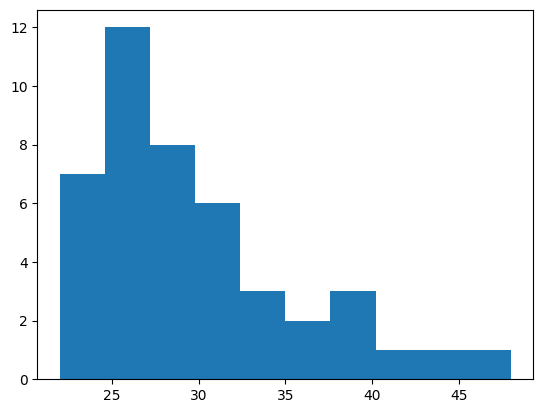

In [3]:
# 2.4.6 Постройте гистограмму распределения возраста мужчин-керлингистов, участвовавших в олимпиаде 2014 года
plt.hist(data[(data['Year'] == 2014) & (data['Sex'] == 'M') & (data['Sport'] == 'Curling')]['Age']);

In [ ]:
# 2.4.7 Рассмотрим зимнюю олимпиаду 2006 года
# Сгруппируйте данные по стране (используйте признак «NOC») и посчитайте для каждой страны количество завоеванных медалей и средний возраст спортсменов
# Выведите только те страны, которые завоевали хотя бы одну медаль
data[(data['Year'] == 2006) & (data['Season'] == 'Winter')].groupby('NOC').agg(count_medals = ('Medal', 'count'), avg_age = ('Age', 'mean')).query('count_medals > 0').round(3)

,count_medals,avg_age
NOC,,
AUS,2,25.711
AUT,30,27.705
BLR,1,27.143
BUL,1,26.182
CAN,69,25.482
CHN,13,23.534
CRO,3,22.761
CZE,27,26.276
EST,3,25.635


In [ ]:
# 2.4.8 Продолжим рассматривать зимнюю олимпиаду 2006 года
# Посчитайте, сколько медалей каждого достоинства завоевала каждая из стран-участниц
# Для этого сгруппируйте данные по стране и по виду медали
# Представьте данные в виде сводной таблицы (pivot_table)
# В сводной таблице не должно быть отсутствующих значений (NaN), замените их на 0.
data[(data['Year'] == 2006) & (data['Season'] == 'Winter')].pivot_table(index = 'NOC', columns = 'Medal', values = 'ID', aggfunc = 'count', fill_value = 0)

Medal,Bronze,Gold,Silver
NOC,,,
AUS,1,1,0
AUT,7,16,7
BLR,0,0,1
BUL,0,0,1
CAN,11,30,28
CHN,6,2,5
CRO,0,1,2
CZE,24,1,2
EST,0,3,0


In [ ]:
# Задание 3

tdata = pd.read_csv('drive/MyDrive/telecom_churn.csv')
tdata.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [ ]:
# 3.1 Выведите общую информацию о дата-фрейме с помощью методов info или describe.
# Есть ли отсутствующие данные?
tdata.describe()
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
# 3.2 С помощью метода value_counts определите, сколько клиентов активны, а сколько потеряно
tdata['Churn'].value_counts()

,count
Churn,
False,2850
True,483


In [ ]:
# Сколько процентов клиентов в имеющихся данных активны, а сколько потеряны?
(tdata['Churn'].value_counts()/len(tdata)).round(3)

,count
Churn,
False,0.855
True,0.145


In [ ]:
# 3.3 Добавьте дополнительный столбец в датафрейм – средняя продолжительность одного звонка
# (вычислить как суммарная продолжительность всех звонков, деленная на суммарное количество всех звонков)
# Отсортируйте данные по этому значению по убыванию и выведите 10 первых записей
tdata['Average call duration'] = (tdata['Total day minutes'] + tdata['Total eve minutes'] + tdata['Total night minutes']) / (tdata['Total day calls'] + tdata['Total eve calls'] + tdata['Total night calls'])
tdata.sort_values('Average call duration', ascending = 0).head(10).round(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Average call duration
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,...,21.21,275.4,102,12.39,13.3,9,3.59,1,True,3.694
2824,OR,81,415,No,No,0,324.7,48,55.20,236.4,...,20.09,187.6,78,8.44,13.1,5,3.54,0,True,3.600
244,VA,108,408,No,No,0,198.5,99,33.75,267.8,...,22.76,354.9,75,15.97,9.4,3,2.54,0,True,3.509
2321,AR,153,408,No,No,0,154.6,56,26.28,263.0,...,22.36,367.7,89,16.55,15.5,2,4.19,1,False,3.429
2033,NJ,162,408,No,No,0,217.6,87,36.99,279.0,...,23.72,250.7,65,11.28,10.4,4,2.81,2,True,3.351
1709,NV,96,408,No,No,0,197.7,68,33.61,250.5,...,21.29,181.2,67,8.15,10.5,3,2.84,3,False,3.348
2536,CT,119,408,No,No,0,294.2,100,50.01,232.5,...,19.76,195.0,64,8.78,9.0,1,2.43,0,True,3.326
1686,CT,163,408,No,Yes,40,231.9,56,39.42,211.8,...,18.00,268.5,74,12.08,12.3,3,3.32,2,False,3.223
649,MO,79,408,No,No,0,261.7,97,44.49,210.6,...,17.90,256.7,83,11.55,6.0,3,1.62,3,True,3.197
2289,MS,98,415,Yes,Yes,23,245.5,54,41.74,292.7,...,24.88,184.0,90,8.28,10.8,7,2.92,1,False,3.181


In [ ]:
# 3.4 Сгруппируйте данные по значению поля «Churn» и вычислите среднюю продолжительность одного звонка в каждой категории
# Есть ли существенная разница в средней продолжительности одного звонка между активными и потерянными клиентами?
tdata.groupby('Churn').agg(avg_call = ('Average call duration', 'mean')).round(3)

,avg_call
Churn,
False,1.938
True,2.091


In [ ]:
# 3.5 Сгруппируйте данные по значению поля «Churn» и вычислите среднее количество звонков в службу поддержки в каждой категории
# Есть ли существенная разница между активными и потерянными клиентами?
tdata.groupby('Churn').agg(avg_call_help = ('Customer service calls', 'mean')).round(3)

,avg_call_help
Churn,
False,1.45
True,2.23


In [ ]:
# 3.6 Исследуйте подробнее связь между параметрами «Churn» и «Customer service calls», построив таблицу сопряженности (факторную таблицу) по этим признакам
# При каком количестве звонков в службу поддержки процент оттока становится существенно выше, чем в целом по датафрейму?
# (В качестве уточнения фразы «существенно выше» можете использовать «более 40%»)
s = pd.crosstab(tdata['Customer service calls'], tdata['Churn'])
s['Outflow'] = s[True] / (s[True] + s[False])
s.round(3)

Churn,False,True,Outflow
Customer service calls,,,
0,605,92,0.132
1,1059,122,0.103
2,672,87,0.115
3,385,44,0.103
4,90,76,0.458
5,26,40,0.606
6,8,14,0.636
7,4,5,0.556
8,1,1,0.500


In [ ]:
# 3.7 Аналогично предыдущему пункту исследуйте связь между параметрами «Churn» и «International plan»
# Можно ли утверждать, что процент оттока среди клиентов, использующих международный роуминг, существенно выше или ниже, чем среди клиентов, не использующих его?
h = pd.crosstab(tdata['International plan'], tdata['Churn'])
h['Outflow'] = h[True] / (h[True] + h[False])
h.round(3)

Churn,False,True,Outflow
International plan,,,
No,2664,346,0.115
Yes,186,137,0.424


In [ ]:
# 3.8 Добавьте в датафрейм столбец «Прогнозируемый отток», заполнив его на основе значений столбцов «Customer service calls» и «International plan»
# Сравните значение в этом столбце со значением столбца «Churn»
# Если мы будем пользоваться построенным прогнозом, то какой процент ошибок первого и второго рода (ложноположительных и ложноотрицательных) мы получим?
tdata['Projected outflow'] = (tdata['Customer service calls'] >= 4) & (tdata['International plan'] == 'Yes')
err1 = tdata[(tdata['Churn'] == False) & (tdata['Projected outflow'] == True)]['Churn'].count()/len(tdata)
err2 = tdata[(tdata['Churn'] == True) & (tdata['Projected outflow'] == False)]['Churn'].count()/len(tdata)
print('Процент ошибок первого рода', err1.round(3))
print('Процент ошибок второго рода', err2.round(3))
tdata.head(5)

Процент ошибок первого рода 0.003
Процент ошибок второго рода 0.139


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Average call duration,Projected outflow
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,False,2.357333,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,False,1.858663,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,False,1.607317,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,False,2.250806,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,False,1.409831,False
